In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding='latin')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='v1', ylabel='count'>

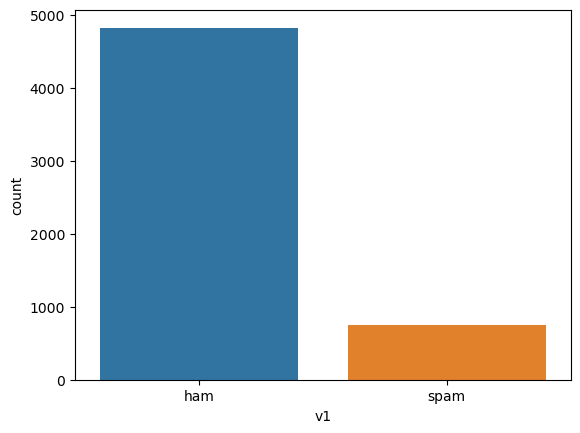

In [12]:
sns.countplot(x=df['v1'])

In [15]:
df['category']=df['v1'].apply(lambda x:1 if x=='ham' else 0)

In [16]:
df.head()

,v1,v2,category
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['v2'],df['category'],test_size=0.2)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [23]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [24]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
clf.score(x_test,y_test)

0.9865470852017937

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       146
           1       0.99      1.00      0.99       969

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

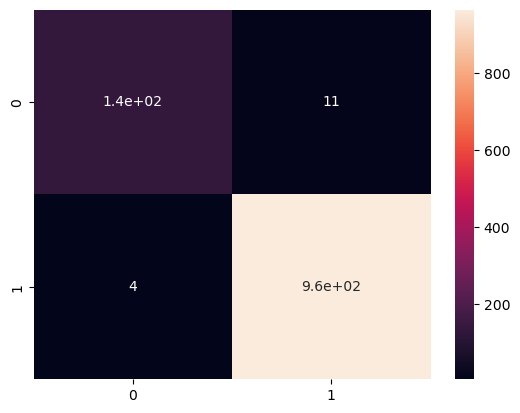

In [32]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,clf.predict(x_test)),annot=True)

In [35]:
clf.predict( [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
])

array([1, 0], dtype=int64)